# Sampling Distributions

## 1. Using Scipy
`rvs` is all that is needed

### Imports

In [101]:
from scipy.stats import norm, uniform
from scipy.integrate import simps
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

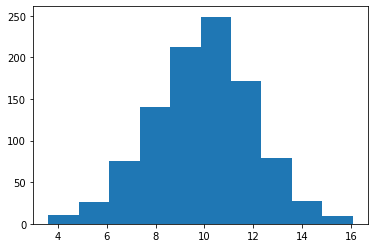

In [4]:
# Random sample from normal dist
plt.hist(norm.rvs(loc=10, scale=2, size=1000));

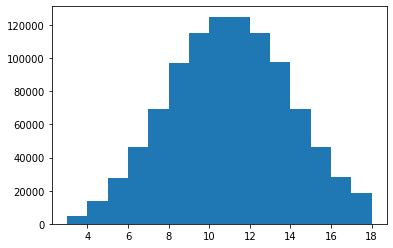

In [38]:
# How about sampling from rolling 3 normal dice
# Min 3, max 18
bin_bounds = list(np.arange(3,19,1))
samples = np.ceil(uniform.rvs(loc=0, scale=6, size=(1000000, 3))).sum(axis=1) # 2D array of samples, summed together
plt.hist(samples, bins=bin_bounds);

## 2. Rejection Sampling
1. Sample a uniform value `x`
2. Sample a uniform `y` value from `0` to the maximum probability in the PDF
3. If `y > p(x)`, throw out the point

Practice by sampling from the **unnormalized** dist `p(x) = sin(x**2) + 1` from `0 --> 4`

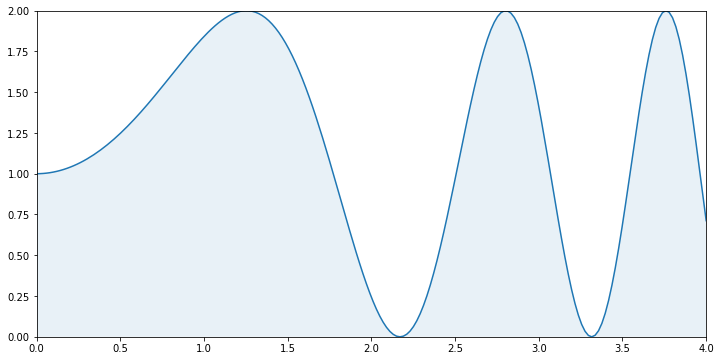

In [84]:
def pdf(x):
    return np.sin(x**2) + 1

xs = np.linspace(0, 4, 200)
ps = pdf(xs)
plt.figure(figsize=(12,6))
plt.plot(xs, ps)
plt.fill_between(xs, 0, ps, alpha=0.1)
plt.xlim(0, 4)
plt.ylim(0, 2);

So we want very few sample around `x=2.25` and `x=3.25`

In [85]:
# Generate random x and y data
n = 100
random_x = uniform.rvs(loc=0, scale=4, size=n)
random_y = uniform.rvs(loc=0, scale=2, size=n)

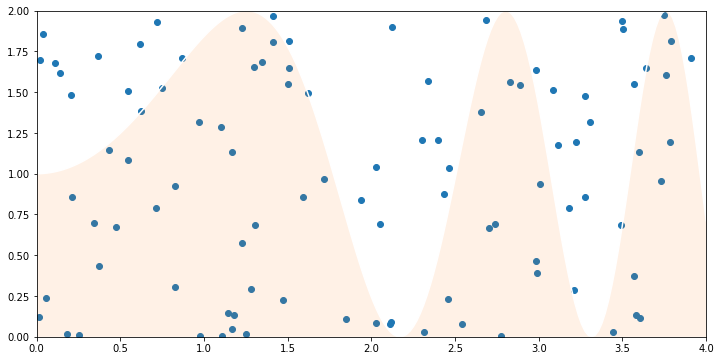

In [86]:
# Scatter plot the random x and random y against the pdf
plt.figure(figsize=(12,6))
plt.scatter(random_x, random_y)
plt.plot(xs, ps, c='w')
plt.fill_between(xs, 0, ps, alpha=0.1)
plt.xlim(0, 4)
plt.ylim(0, 2);

In [87]:
# Now we want to reject the samples that are above the pdf line
passed = random_y <= pdf(random_x)

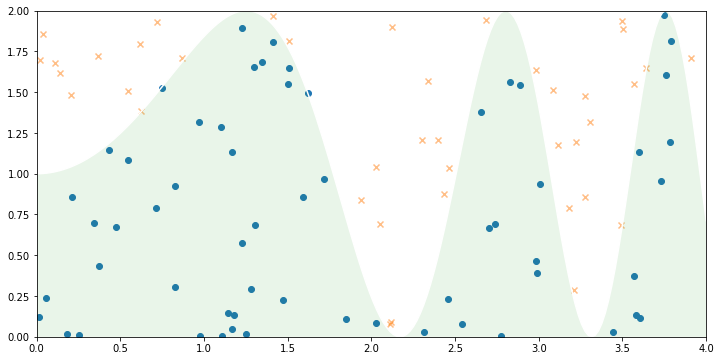

In [88]:
# Plot the rejected and passed values
plt.figure(figsize=(12,6))
plt.scatter(random_x[passed], random_y[passed])
plt.scatter(random_x[~passed], random_y[~passed], marker='x', alpha=0.5)
plt.plot(xs, ps, c='w')
plt.fill_between(xs, 0, ps, alpha=0.1)
plt.xlim(0, 4)
plt.ylim(0, 2);

In [89]:
# Let's try now to generate points and compare to prob function to see how good it is
n2 = 100000
# Generate n2 test points
x_test = uniform.rvs(scale=4, size=n2)
# See which ones pass
x_final = x_test[uniform.rvs(scale=2, size=n2) <= pdf(x_test)]

59357


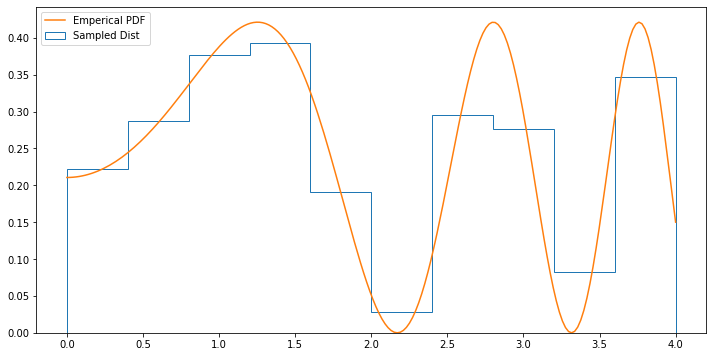

In [90]:
print(len(x_final))
plt.figure(figsize=(12,6))
plt.hist(x_final, density=True, histtype='step', label='Sampled Dist')
plt.plot(xs, ps / simps(ps, x=xs), label='Emperical PDF') # ps / simps(ps, x=xs) is dividing the total prob by area under curve
plt.legend(loc=2);

 #### Note that we are left with about 60,000 points from the initial 100,000

## 3. Inversion Sampling

- For all PDFs, the CDF goes from 0 to 1
- Start with uniform sampling of CDF from 0 to 1
- Invert that function to get the x value that gices the sampled CDF

- Try `p(x) = 2x**3`
- Then `CDF(x) = x**3`
- Now invert CDF to get `x = CDF**(1/3)`

In [91]:
def pdf(x):
    return 3 * x**2

def cdf(x):
    return x**3

def icdf(cdf):
    return cdf**(1/3)

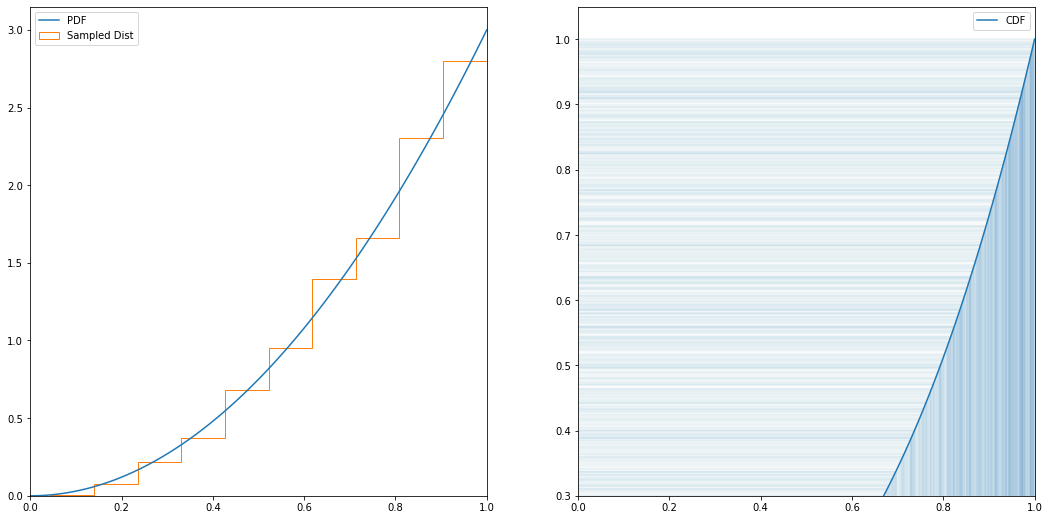

In [99]:
# Get values
xs = np.linspace(0, 1, 100)
pdfs = pdf(xs)
cdfs = cdf(xs)

# Get n samples
n = 2000
# Get unifrom random values for these
u_samps = uniform.rvs(size=n)
# Get the Inverse CDF of these samples to get the X values
x_samps = icdf(u_samps)

# Lets plot it
fig, axes = plt.subplots(ncols=2, figsize=(18, 9))
axes[0].plot(xs, pdfs, label='PDF')
axes[0].hist(x_samps, density=True, histtype='step', label='Sampled Dist')
axes[1].plot(xs, cdfs, label='CDF')
# Add the horizontal and vertical trace lines
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[0].legend(), axes[1].legend()
axes[1]
# Set some limits
axes[1].set_xlim(0,1), axes[1].set_ylim(0.1);
axes[0].set_xlim(0,1), axes[1].set_ylim(0.3);

See that the CDF sampling (y-axis second graph) is pretty normally distributed, but the X values are not (they are heavier towards the x values where the CDF is higher

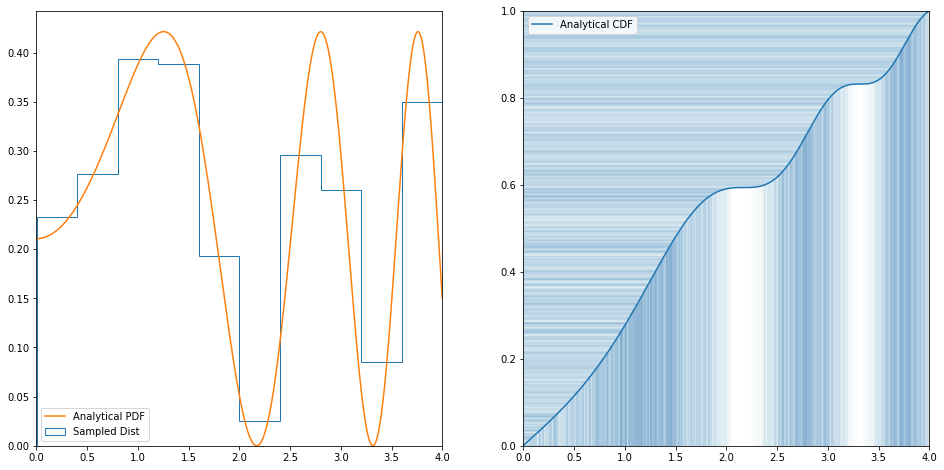

In [129]:
# Repeat method on `sin(x)` function from before

# Start with the PDF function
def pdf(x):
    return np.sin(x**2) + 1

# Get pdf samples
xs = np.linspace(0, 4, 1000)
pdfs = pdf(xs)

# Get CDFs
cdfs = pdfs.cumsum() / pdfs.sum() # DANGEROUS

# Randomly sample the PDFs from 0 to 1 and get corresponding X values by interpolating
u_samps = uniform.rvs(size=4000)
x_samps = interp1d(cdfs, xs, bounds_error=False, fill_value=1)(u_samps) # Will throw an error if a random sample between 0 and 1 is lower than 1/1000

# Plot
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
axes[0].hist(x_samps, density=True, histtype='step', label='Sampled Dist')
axes[0].plot(xs, pdfs/4.747, label='Analytical PDF')
axes[0].legend(loc=3), axes[0].set_xlim(0,4)

axes[1].plot(xs, cdfs, label='Analytical CDF')
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[1].legend(loc=2), axes[1].set_xlim(0,4), axes[1].set_ylim(0,1);


